In [1]:
from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dengue_model, train_chik_model, transf_and_pred_chik, apply_dl_dengue_on_chik

2023-11-20 19:42:01.609364: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 19:42:01.610946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 19:42:01.633003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 19:42:01.633026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 19:42:01.633054: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
city = 2913606
state = 'BA'
INI_DATE = '2014-10-01'
END_DATE_TRAIN = '2022-11-01'
END_DATE = '2023-11-01'

### Train the dengue DL model:

Compilation Time :  0.0014390945434570312
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 52, 70)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 64)            69120     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


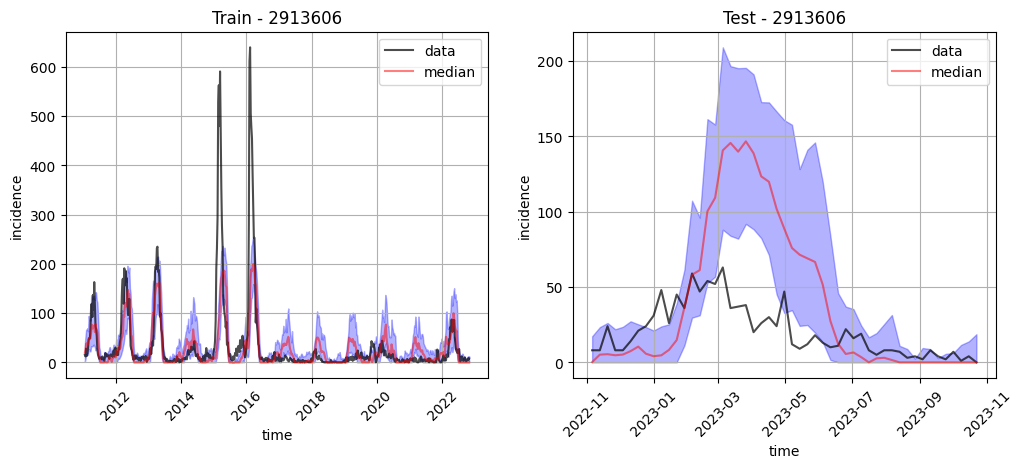

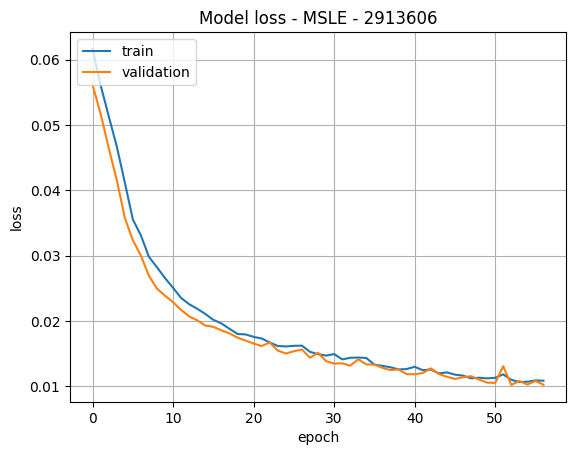

CPU times: user 20min 6s, sys: 2min 27s, total: 22min 33s
Wall time: 8min 36s


In [4]:
%%time 
train_dengue_model(city,  end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

### Apply this dengue DL model on chik data: 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


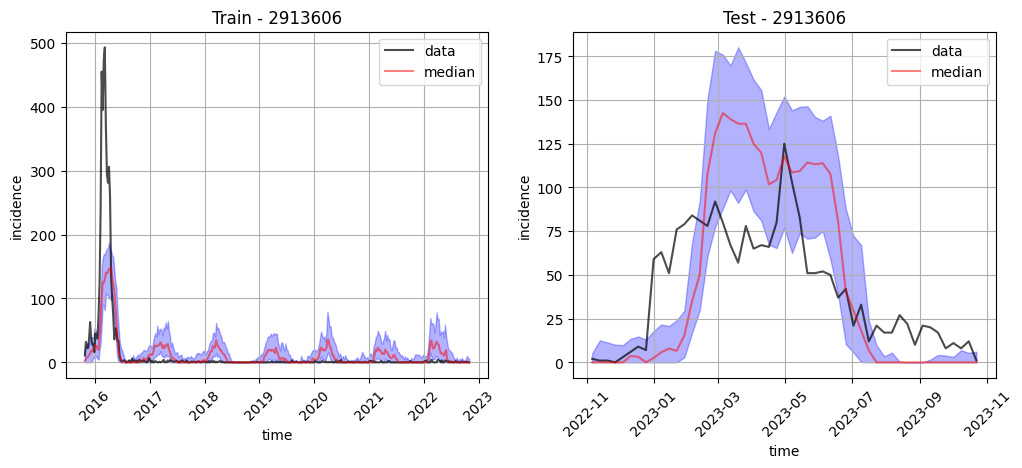

CPU times: user 12min 11s, sys: 1min 41s, total: 13min 52s
Wall time: 5min 56s


In [5]:
%%time
apply_dl_dengue_on_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

## Apply the transfer: 

Compilation Time :  0.001428842544555664
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 52, 70)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 64)            69120     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                  

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


366/366 [==============================] - 10s 22ms/step - loss: 0.0269 - accuracy: 0.4617 - mape: 2367148.7500 - mse: 0.0072
Epoch 2/250
366/366 [==============================] - 8s 22ms/step - loss: 0.0221 - accuracy: 0.4727 - mape: 1549946.0000 - mse: 0.0046
Epoch 3/250
366/366 [==============================] - 8s 22ms/step - loss: 0.0206 - accuracy: 0.4918 - mape: 1270331.5000 - mse: 0.0056
Epoch 4/250
366/366 [==============================] - 8s 23ms/step - loss: 0.0183 - accuracy: 0.5082 - mape: 1162720.3750 - mse: 0.0036
Epoch 5/250
366/366 [==============================] - 8s 21ms/step - loss: 0.0171 - accuracy: 0.4863 - mape: 1599754.3750 - mse: 0.0036
Epoch 6/250
366/366 [==============================] - 8s 21ms/step - loss: 0.0166 - accuracy: 0.5219 - mape: 492193.5000 - mse: 0.0044
Epoch 7/250
366/366 [==============================] - 8s 21ms/step - loss: 0.0166 - accuracy: 0.4781 - mape: 1087243.7500 - mse: 0.0051
Epoch 8/250
366/366 [==============================] 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


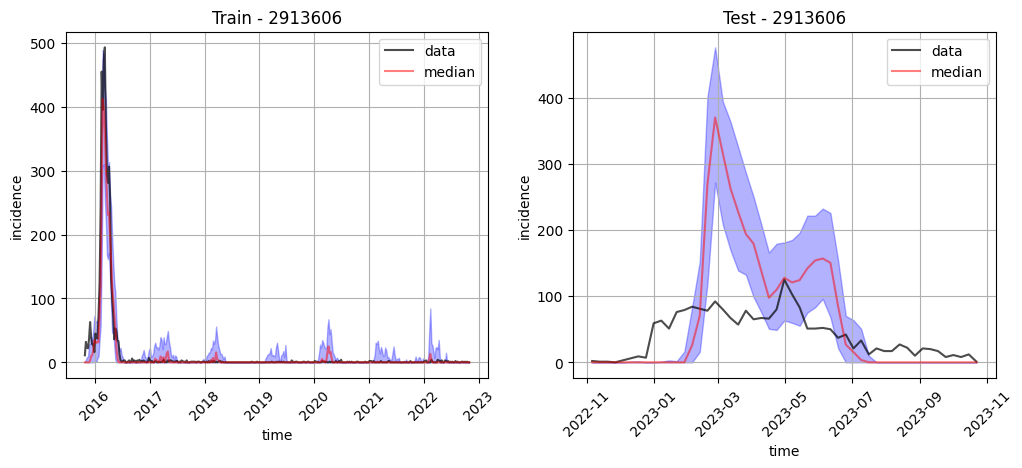

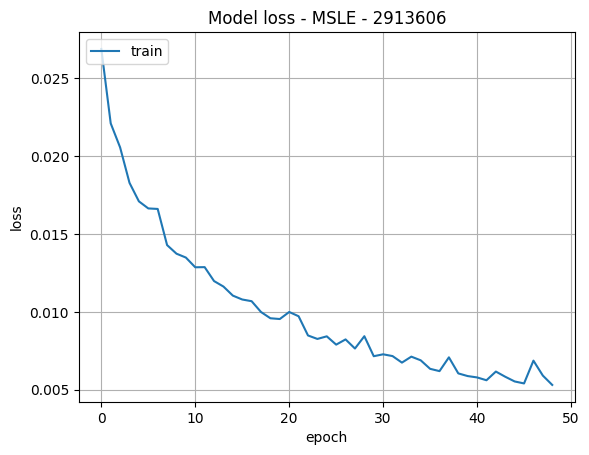

CPU times: user 42min 27s, sys: 4min 52s, total: 47min 20s
Wall time: 17min 40s


In [6]:
%%time 

transf_and_pred_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

### Train the dengue pgbm model 

In [7]:
%%time
train_pgbm_dengue(city, state, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



TypeError: HistGradientBoostingRegressor.__init__() got an unexpected keyword argument 'objective'

### Apply the dengue pgbm model on chik:

In [8]:
%%time
apply_dengue_pgbm_on_chik(city, state, ini_date=INI_DATE, end_date= END_DATE)



TypeError: HistGradientBoostingRegressor.__init__() got an unexpected keyword argument 'init_model'

### Train the chik DL model:

In [ ]:
%%time 

train_chik_model(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

Compilation Time :  0.0014624595642089844
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 52, 70)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 64)            69120     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


69/69 [==============================] - 7s 49ms/step - loss: 0.0631 - accuracy: 0.1533 - mape: 6338992.0000 - mse: 0.0204 - val_loss: 0.0517 - val_accuracy: 0.1739 - val_mape: 10701040.0000 - val_mse: 0.0018
Epoch 2/250
69/69 [==============================] - 3s 38ms/step - loss: 0.0597 - accuracy: 0.2044 - mape: 10897965.0000 - mse: 0.0200 - val_loss: 0.0484 - val_accuracy: 0.3913 - val_mape: 4879944.0000 - val_mse: 0.0016
Epoch 3/250
69/69 [==============================] - 3s 37ms/step - loss: 0.0565 - accuracy: 0.2117 - mape: 12303679.0000 - mse: 0.0196 - val_loss: 0.0455 - val_accuracy: 0.3804 - val_mape: 5930573.0000 - val_mse: 0.0015
Epoch 4/250
69/69 [==============================] - 3s 38ms/step - loss: 0.0532 - accuracy: 0.3139 - mape: 9483675.0000 - mse: 0.0189 - val_loss: 0.0430 - val_accuracy: 0.3043 - val_mape: 9731181.0000 - val_mse: 0.0015
Epoch 5/250
69/69 [==============================] - 2s 35ms/step - loss: 0.0495 - accuracy: 0.3212 - mape: 8081342.5000 - mse: 0

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Train the chik PGBM model:

In [ ]:
%%time
train_pgbm_chik(city, state, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)
